<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Logs</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li> Function that Makes a Graph</li>
        <li> yfinance to Extract Stock Data</li>
        <li>Webscraping to Extract Tesla Revenue Data</li>
        <li>Use yfinance to Extract Stock Data</li>
        <li>Use Webscraping to Extract GME Revenue Data</li>
        <li> Plot Tesla Stock Graph</li>
        <li>Plot GameStop Stock Graph</li>
    </ul>
</div>

<hr>


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [8]:
#to get information about apple on yfinance
tesla_info=tesla.info
tesla_info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

In [10]:
#histy of rise and clsoe and open stock market prices
tesla_share_price_data = tesla.history(period="max")
tesla_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-07-21,765.320007,819.799988,764.599976,815.119995,47344100,0,0.0
2022-07-22,828.659973,842.359985,812.140015,816.729980,34421200,0,0.0
2022-07-25,816.650024,822.440002,802.200012,805.299988,21357800,0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [11]:
#top of data
tesla_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


<AxesSubplot:xlabel='Date'>

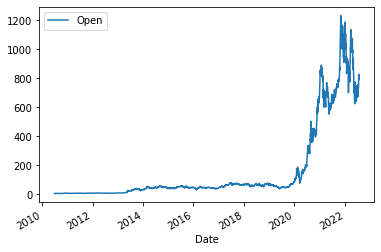

In [65]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.plot(x="Date", y="Open")


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2022-01-01). Save the text of the response as a variable named `html_data`.


In [27]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2022-01-01"

html_data  = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [22]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [36]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)    

/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3424562045.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3424562045.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3424562045.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3424562045.

Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [37]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/349343550.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


Execute the following lines to remove an null or empty strings in the Revenue column.


In [38]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [39]:
read_html_pandas_data = pd.read_html(str(soup))


In [55]:
tesla_revenue = read_html_pandas_data[1]

tesla_revenue.tail()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
48,2010-06-30,$28
49,2010-03-31,$21
50,2009-12-31,NaN
51,2009-09-30,$46
52,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [45]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [47]:
#to get information about apple on yfinance
gamestop_info=gamestop.info
gamestop_info

{'zip': '76051',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 12000,
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It also sells collectibles comprising licensed merchandise primarily related to the gaming, television, and movie industries, as well as pop culture themes. As of January 29, 2022, the company operated 4,573 stores and ecommerce sites under the GameStop, EB Games, and Micromania brands; and 50 pop culture themed stores that sell collectibles, apparel, gadgets, electronics, toys, and other retail products under the Zing Pop Culture brand, 

In [48]:
#histy of rise and clsoe and open stock market prices
gamestop_share_price_data = gamestop.history(period="max")
gamestop_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2022-07-21,39.930000,40.000000,37.290001,38.367500,9277600,0.0,0.0
2022-07-22,36.880001,38.700001,34.930000,35.779999,10039800,0.0,4.0
2022-07-25,35.000000,35.509998,33.250000,33.980000,5686300,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [51]:
gamestop_share_price_data.head()
gamestop_share_price_data.reset_index(inplace=True)

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5144,5144,2022-07-21,39.930000,40.000000,37.290001,38.367500,9277600,0.0,0.0
5145,5145,2022-07-22,36.880001,38.700001,34.930000,35.779999,10039800,0.0,4.0
5146,5146,2022-07-25,35.000000,35.509998,33.250000,33.980000,5686300,0.0,0.0
5147,5147,2022-07-26,32.869999,33.310001,32.099998,32.430000,4850800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage <https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html>. Save the text of the response as a variable named `html_data`.


In [56]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data1  = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [57]:
soup = BeautifulSoup(html_data1, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [58]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)    

/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3347890136.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3347890136.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3347890136.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)
/var/folders/17/z0g774w56n5_cv0kn_h5nvj40000gn/T/ipykernel_28785/3347890136.py:11: Futur

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [64]:
read_html_pandas_data = pd.read_html(str(soup))
gme_revenue = read_html_pandas_data[1]

gme_revenue.tail()


,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


<AxesSubplot:xlabel='Date'>

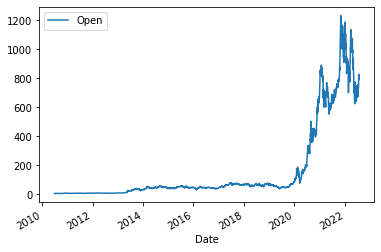

In [66]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.plot(x="Date", y="Open")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<AxesSubplot:xlabel='Date'>

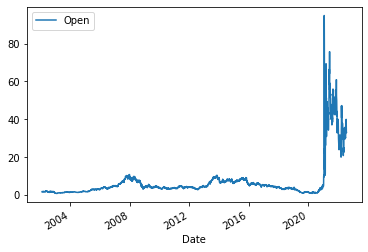

In [67]:
gamestop_share_price_data.reset_index(inplace=True)
gamestop_share_price_data.plot(x="Date", y="Open")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part   |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab         |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
